# Context : Data Exploration




Source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


**Description**


Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.




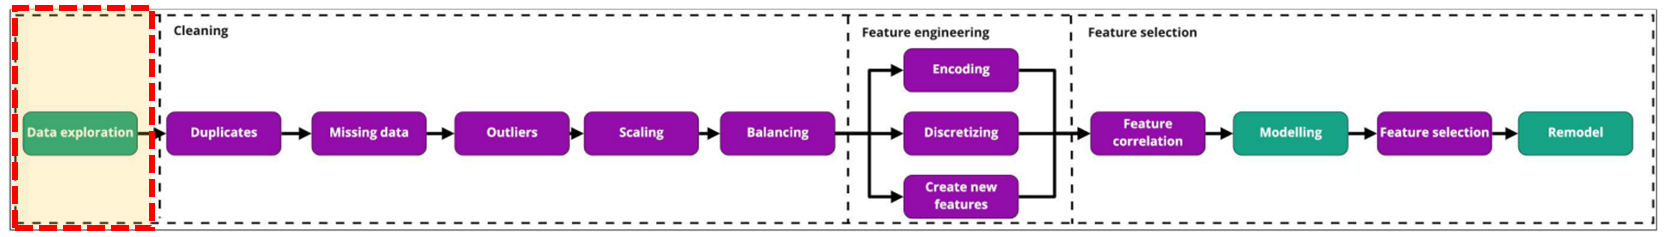


# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split


# Retrieve data

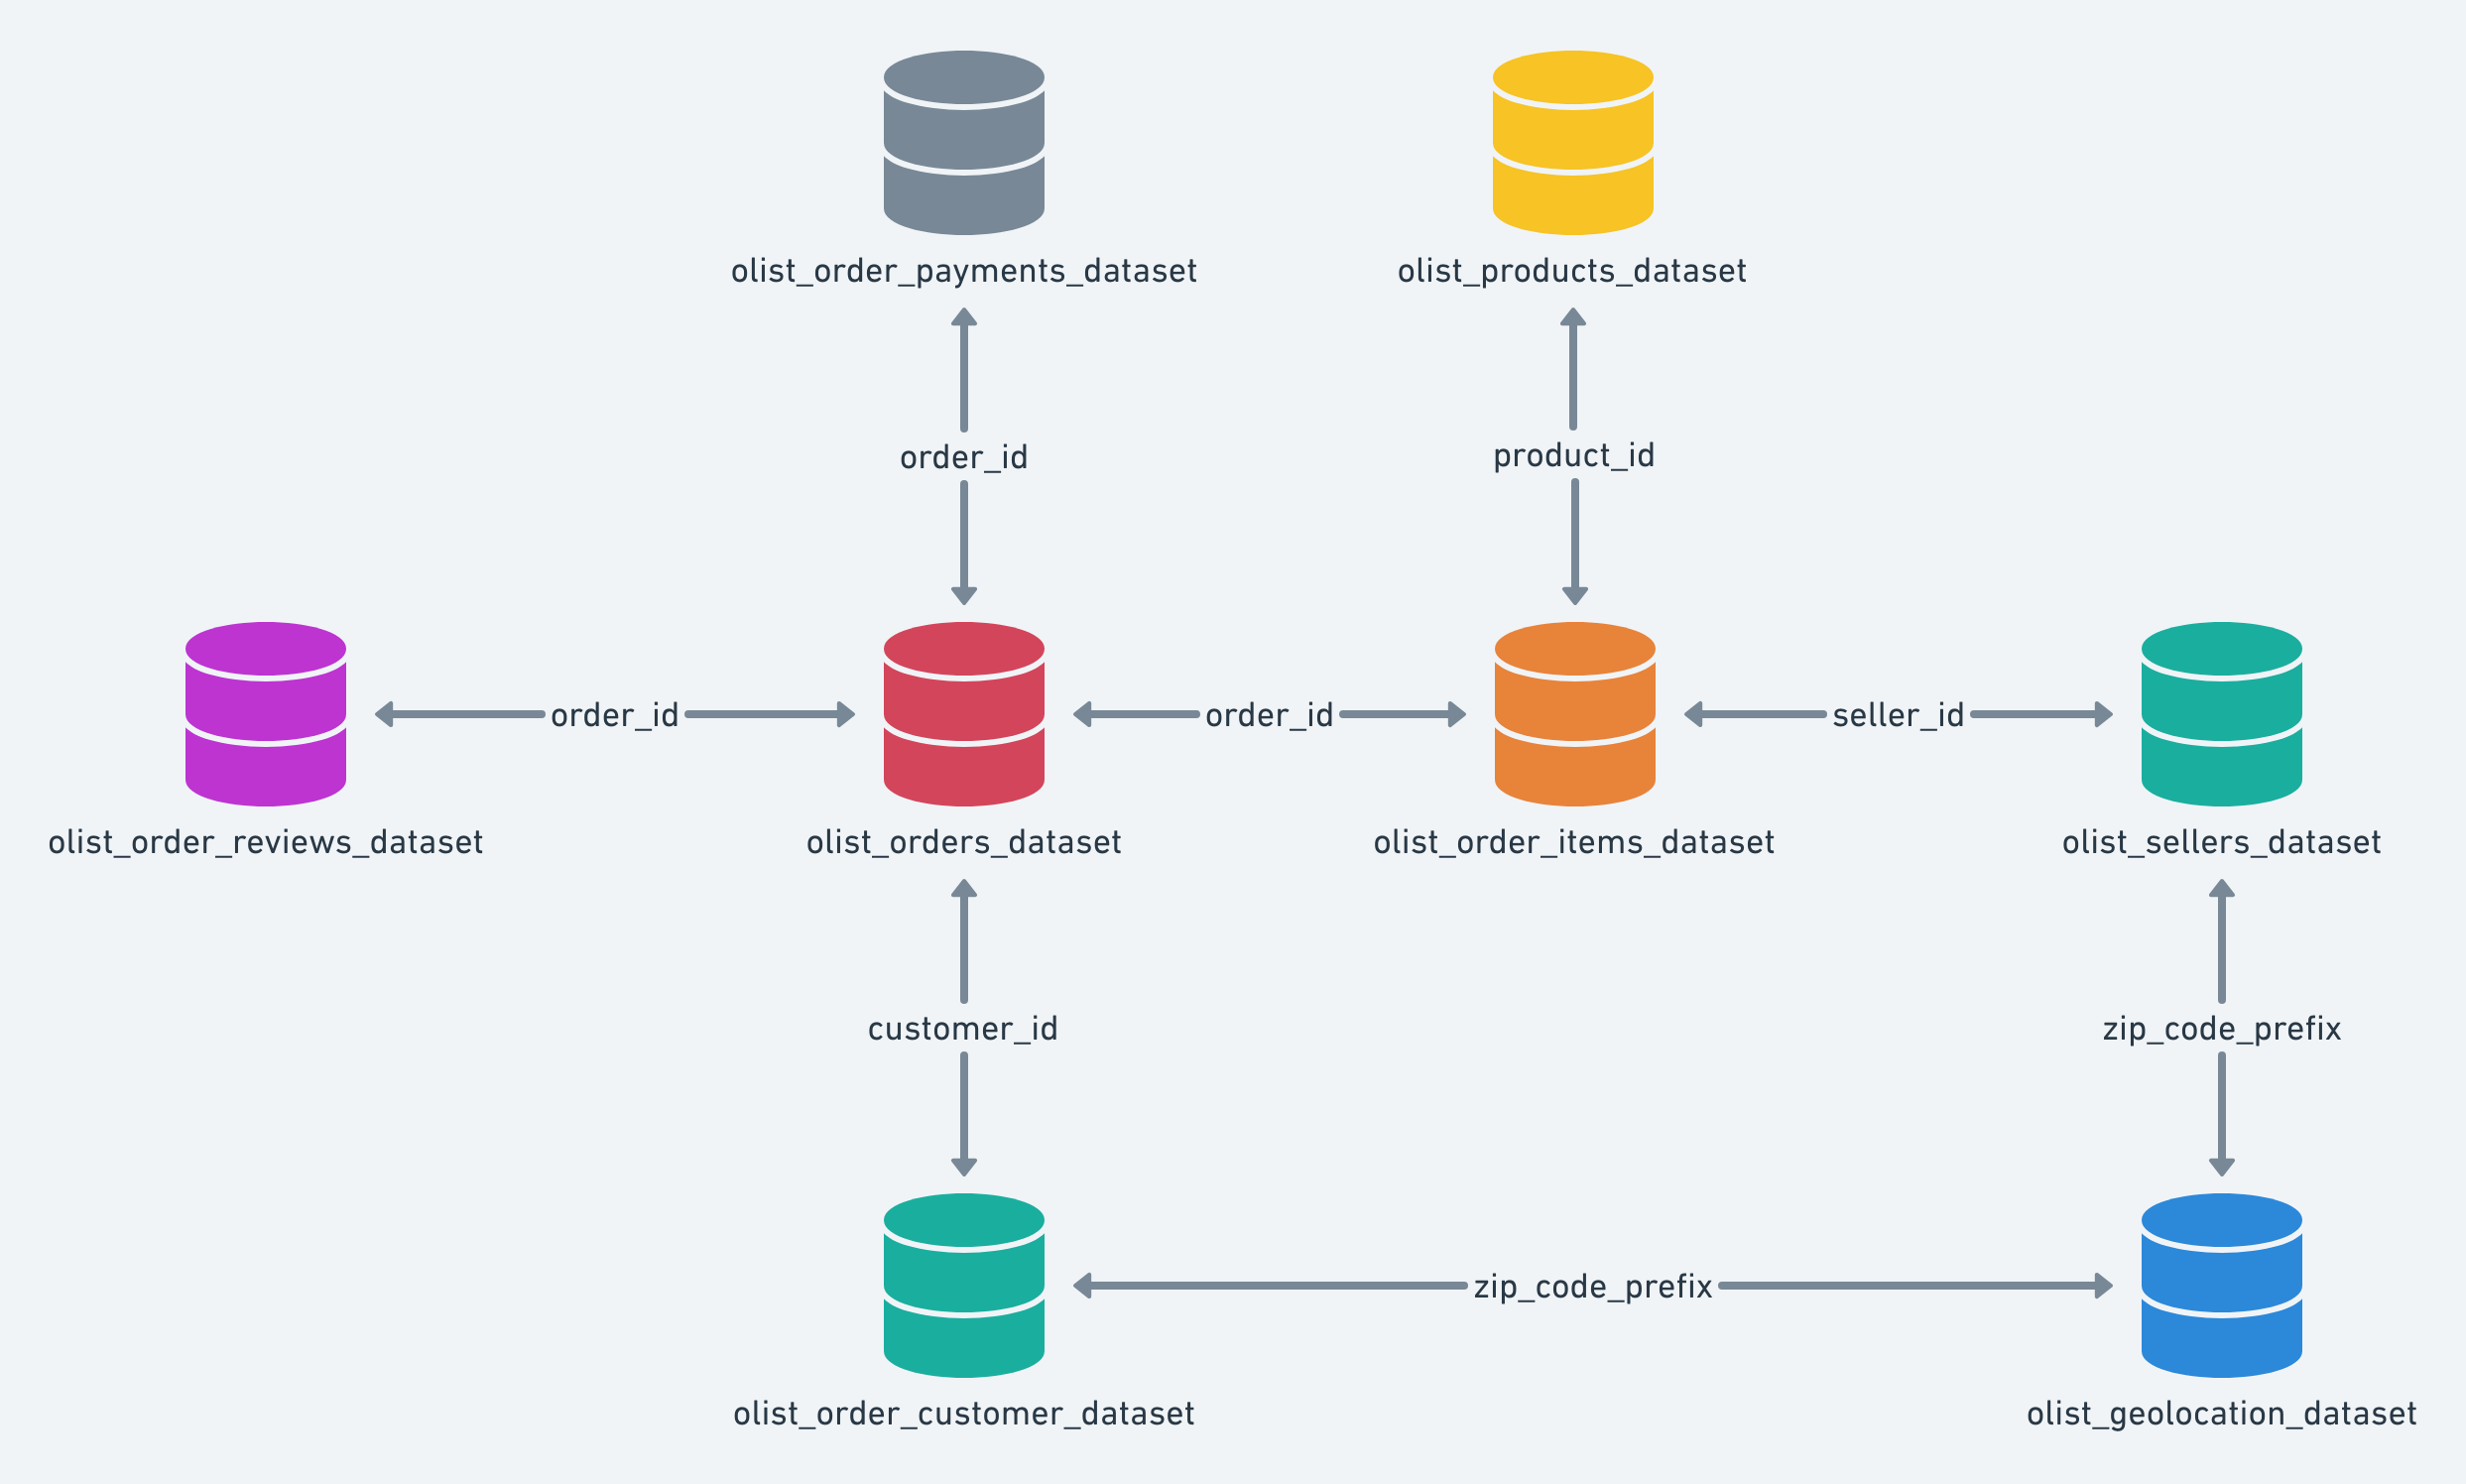

## Get the raw data


### Customers table


In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
file_name = 'olist_customers_dataset.csv'
customers = pd.read_csv(path_to_data + file_name)
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
# Make a copy of the data
customers_copy = customers.copy()

In [4]:
# Shape
customers.shape

(99441, 5)

In [5]:
# Columns
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [6]:
# Statistics
customers.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

In [7]:
# Data info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


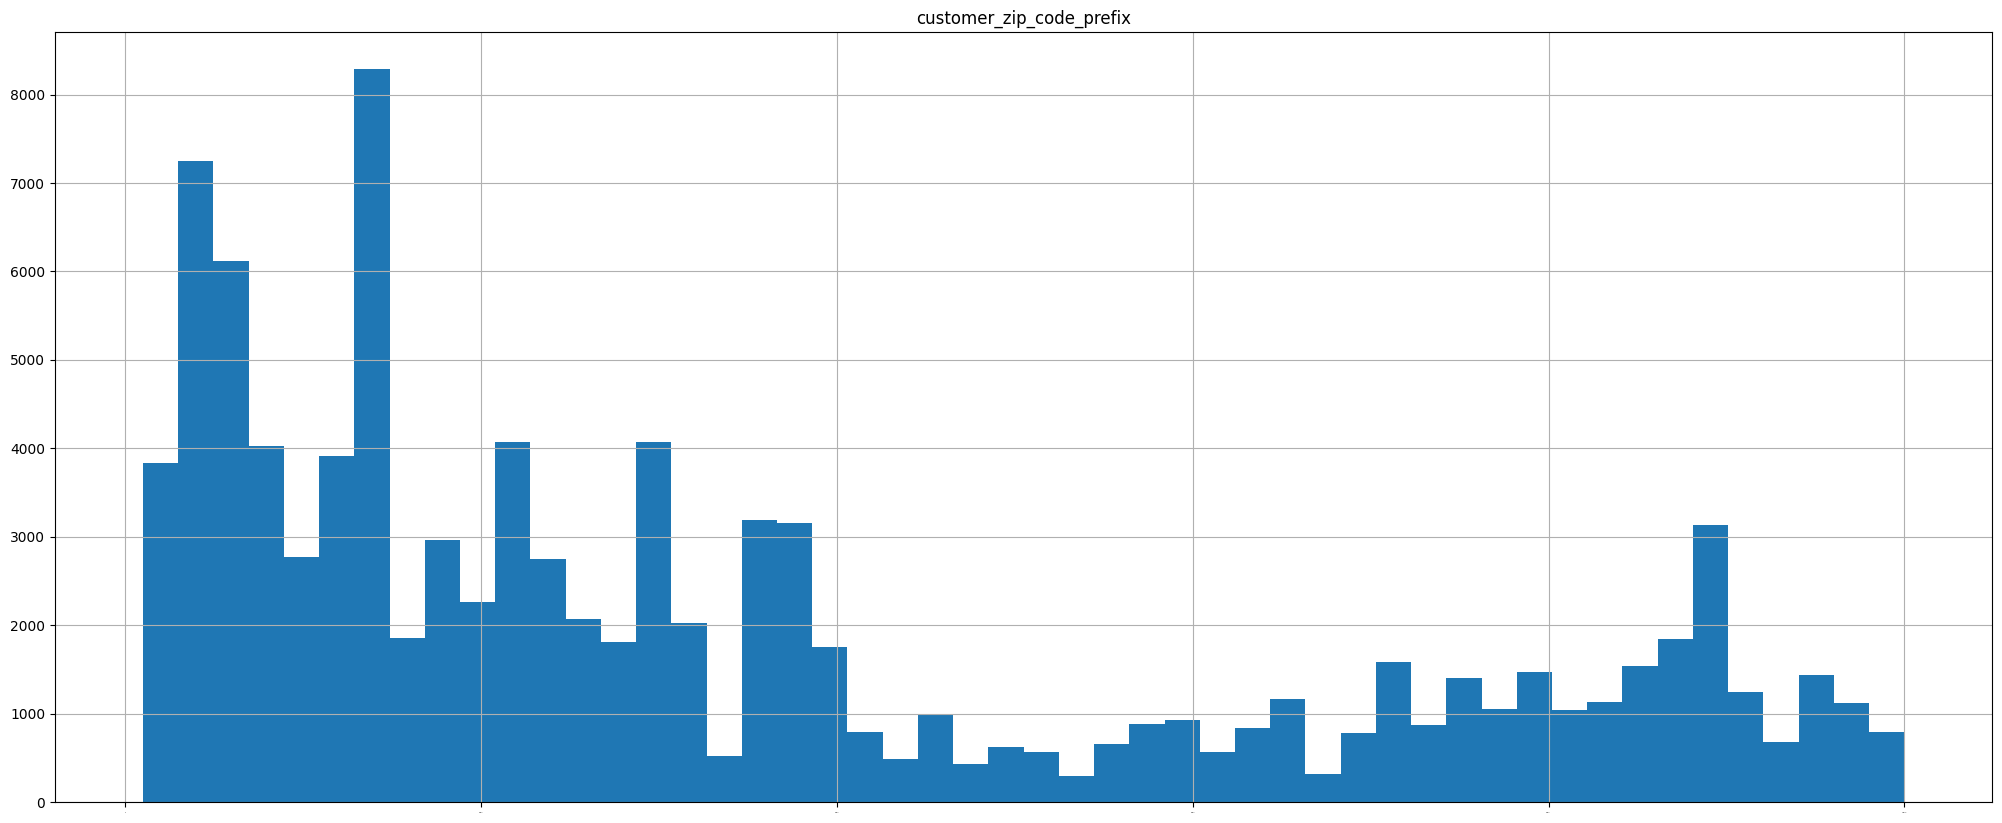

In [8]:
# Data histograms
customers.hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()

### Orders table


In [9]:
#Retrieve data
path_to_data = '../data/raw_data/'
file_name = 'olist_orders_dataset.csv'
orders = pd.read_csv(path_to_data + file_name)
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [10]:
# Make a copy of the data
orders_copy = orders.copy()

In [11]:
# Shape
orders.shape

(99441, 8)

In [12]:
# Columns
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [13]:
# Statistics
orders.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

In [14]:
# Data info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Order reviews


In [15]:
#Retrieve data
path_to_data = '../data/raw_data/'
file_name = 'olist_order_reviews_dataset.csv'
order_reviews = pd.read_csv(path_to_data + file_name)
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [16]:
# Make a copy of the data
order_reviews_copy = order_reviews.copy()

In [17]:
# Shape
order_reviews.shape

(99224, 7)

In [18]:
# Columns
order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [19]:
# Statistics
order_reviews.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [20]:
# Data info
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
#List the columns that won't be used (exemple : Id, Name, ...)
cols_to_drop = ['review_comment_title','review_comment_message']

order_reviews = order_reviews.drop(columns=cols_to_drop)
order_reviews.shape

(99224, 5)

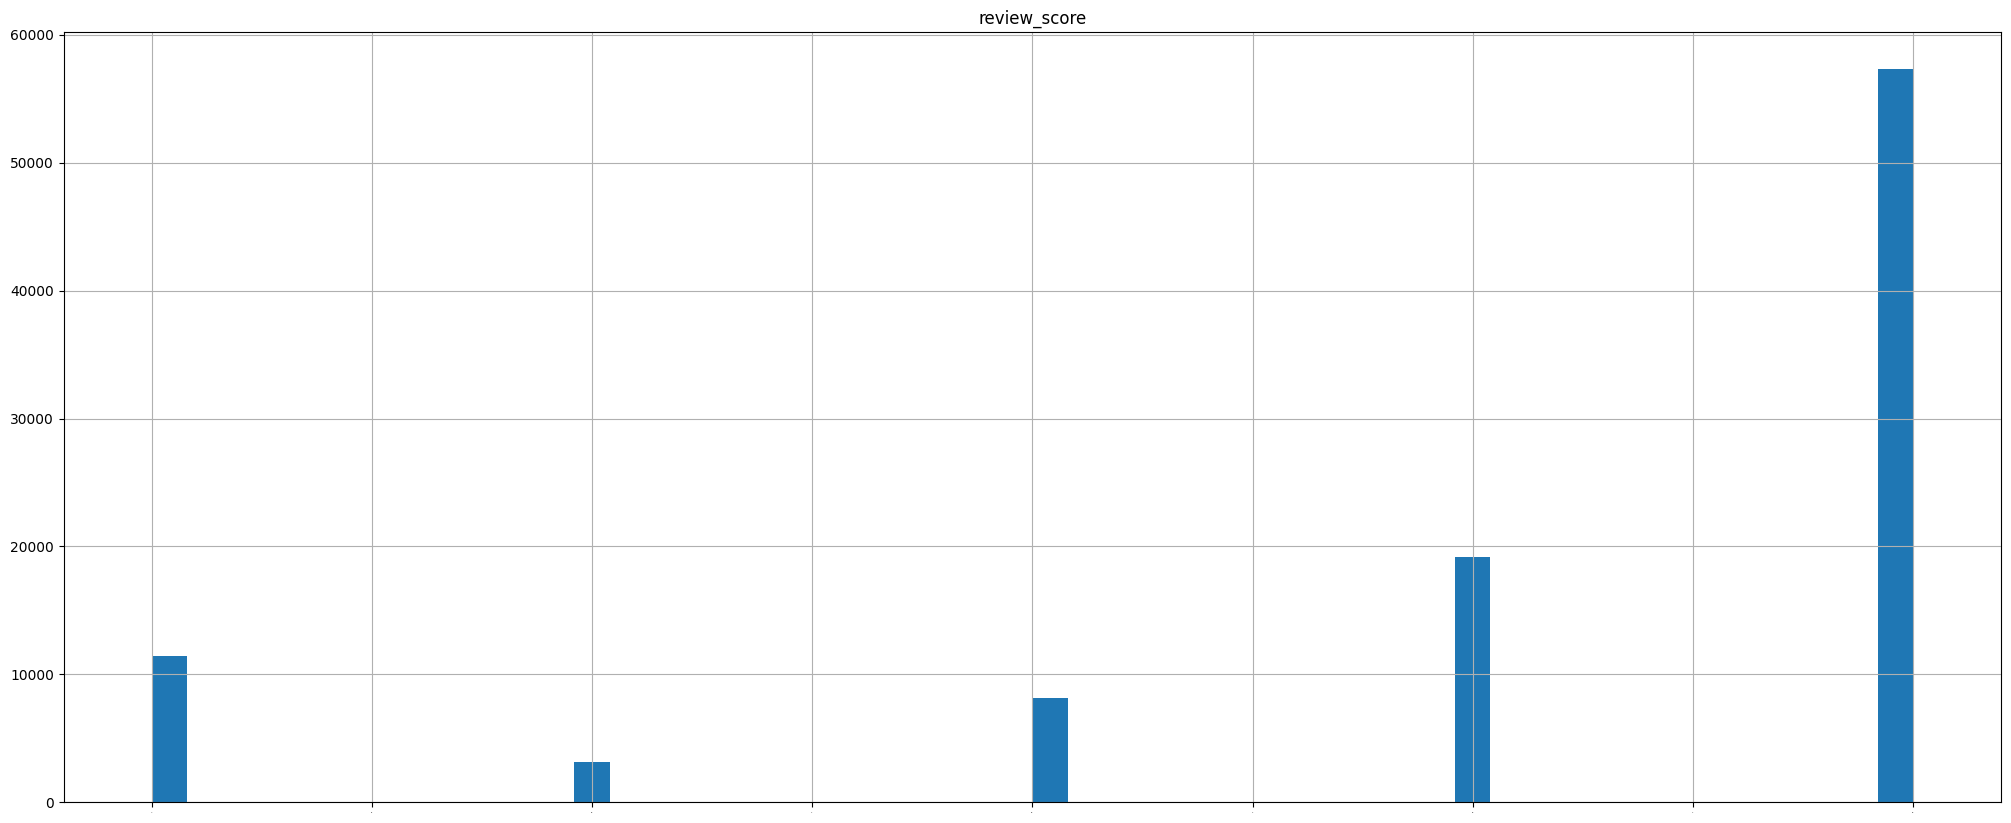

In [22]:
# Data histograms
order_reviews.hist(bins = 50, figsize = (25,10), xlabelsize=0)

plt.show()

### Order items


In [23]:
#Retrieve data
path_to_data = '../data/raw_data/'
file_name = 'olist_order_items_dataset.csv'
olist_order_items = pd.read_csv(path_to_data + file_name)
olist_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [24]:
# Make a copy of the data
olist_order_items_copy = olist_order_items.copy()

In [25]:
# Shape
olist_order_items.shape

(112650, 7)

In [26]:
# Columns
olist_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [27]:
# Statistics
olist_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [28]:
# Data info
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


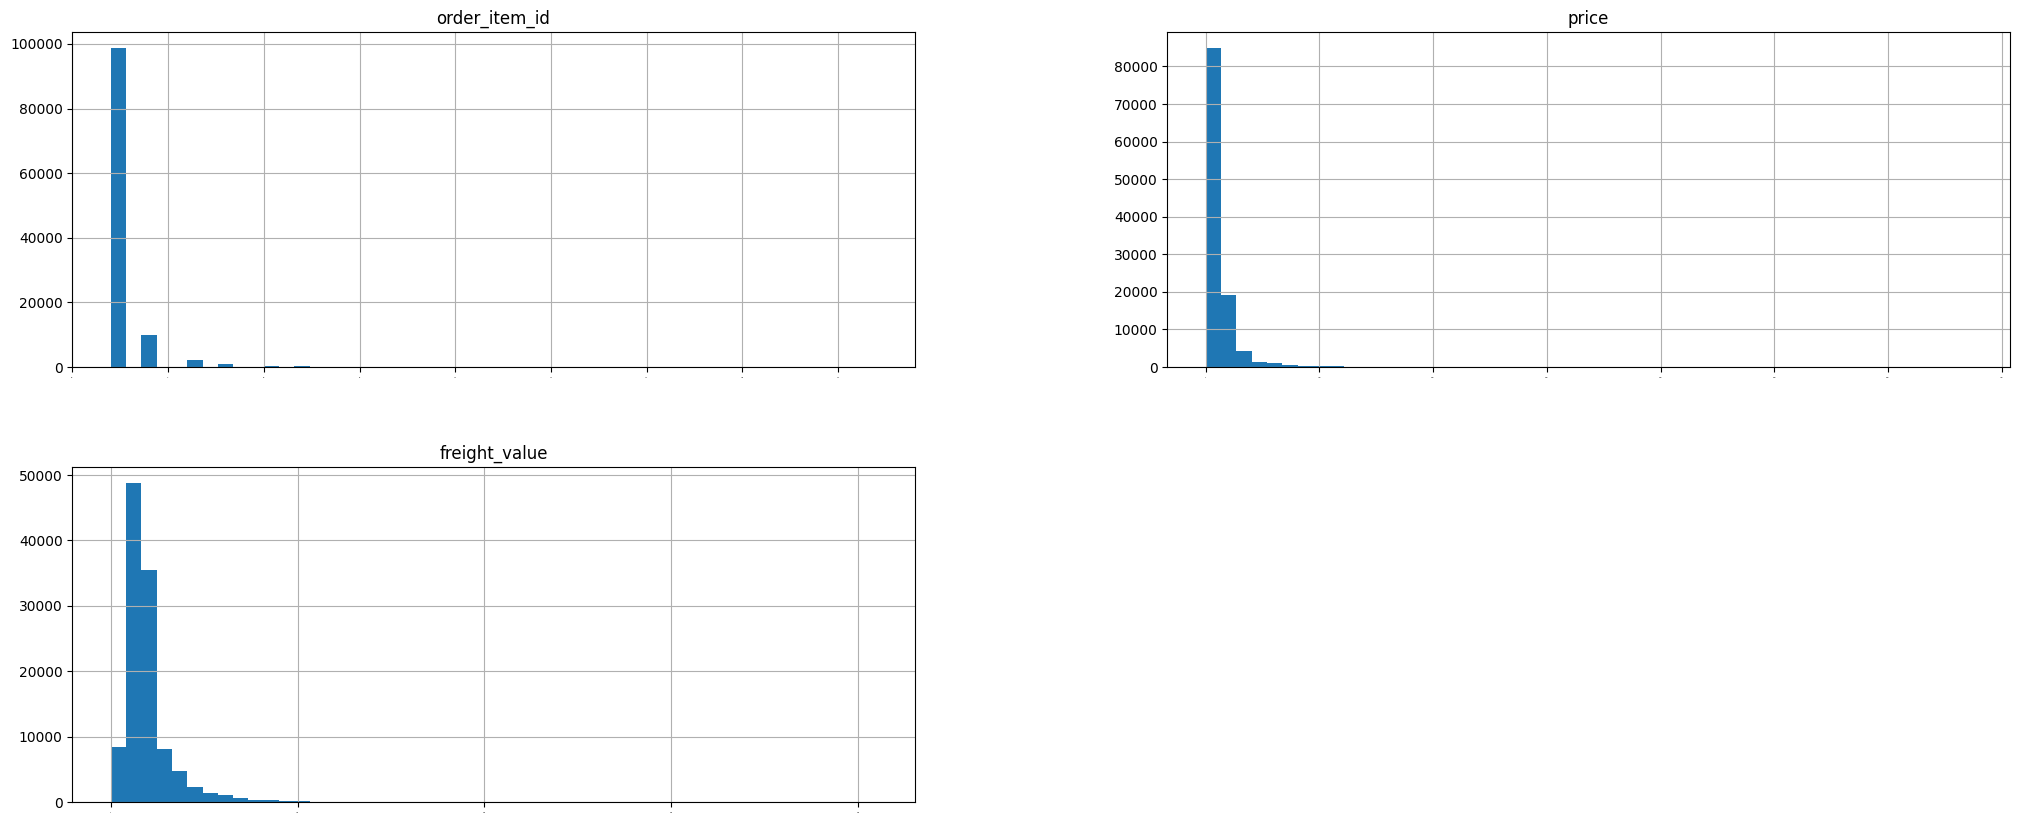

In [29]:
# Data histograms
olist_order_items.hist(bins = 50, figsize = (25,10), xlabelsize=0)

plt.show()

In [32]:
olist_order_items[olist_order_items['order_id']=='00143d0f86d6fbd9f9b38ab440ac16f5']

order_id  order_item_id  \
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   

                          product_id                         seller_id  \
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   

    shipping_limit_date  price  freight_value  
32  2017-10-20 16:07:52  21.33           15.1  
33  2017-10-20 16:07:52  21.33           15.1  
34  2017-10-20 16:07:52  21.33           15.1

In [31]:
print i


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (908402389.py, line 1)

## Drop initial columns


In [ ]:
#List the columns that won't be used (exemple : Id, Name, ...)
cols_to_drop = ['Id']

train_set = train_set.drop(columns=cols_to_drop)
train_set.shape

# Explore data


## Generic data

In [ ]:
# Shape
train_set.shape

In [ ]:
# Columns
train_set.columns

In [ ]:
# Statistics
train_set.describe()

In [ ]:
# Data info
# train_set.info()

In [ ]:
# Data histograms
train_set.hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()

## Visualization : Column histograms


<span style="font-family:Comic Sans MS; color:red">Input target name here : </span>



In [ ]:
# Defining the target name
target_name = 'SalePrice'

In [ ]:
# Display hist plots for numerical features.
for col in train_set.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_set[col], kde=True, bins=100)   
    plt.title(f'{col}')
#     plt.xlabel('Average Monthly Hours')
#     plt.ylabel('Frequency')
plt.show()

## Visualization : Continuous target / Numerical features

In [ ]:
#Numerical Features
numerical_features = train_set.select_dtypes(include = 'number').columns.values.tolist()


### Numerical features with LOW number of unique values


<span style="font-family:Comic Sans MS; color:red">If a numerical feature has a relatively low number of unique values, we can "see" it like a pseudo-categorical feature during visualization. </span>



In [ ]:
# Max threshold for number of unique values within a column
max_unique = 20

# Numerical features with more than X unique values
numerical_features_small_uniques = []

for col in numerical_features:
    if len(train_set[col].unique()) < max_unique:
        numerical_features_small_uniques.append(col)
numerical_features_small_uniques;

#### Barplot


In [ ]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None) 
    ax.bar_label(ax.containers[0], fontsize=8);
    

#### Violin plots


In [ ]:
# Display violin plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col,
           y=target_name,        
           data=train_set)
    

#### Box plots

In [ ]:
# Display box plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set,
            x=col, 
            y=target_name)
    

### Numerical features with HIGH number of unique values

In [ ]:
# Numerical features with more than X unique values
numerical_features_high_uniques = []

for col in numerical_features:
    if col not in numerical_features_small_uniques:
        numerical_features_high_uniques.append(col)
numerical_features_high_uniques;


#### Scatter plots


In [ ]:
# Display scatter plots for numerical features having a number of unique values greater than a max_threshold.
for col in numerical_features_high_uniques:   
    plt.figure(figsize=(8, 8))    
    sns.scatterplot(data=train_set,
                    x=col,
                    y=target_name)
    plt.grid(visible=None, which='major', axis='both')  

### Correlation between numerical features

#### Correlation heatmap

In [ ]:
# Heatmap of pairwise correlations
correlation_matrix = train_set.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


#### Correlation matrix 

In [ ]:
#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = train_set.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df


In [ ]:
#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(10)


#### Scatter matrix with high correlated features with the target value



In [ ]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats = 6

high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)


In [ ]:
# Display scatter matrix for numerical
scatter_matrix(train_set[high_corr_feats_list], figsize= (12,8))
plt.show()


## Visualization : Continuous target / Categorical features

In [ ]:
#Categorical Features
categorical_features = train_set.select_dtypes(exclude = 'number').columns.values.tolist()


### Bar plot

In [ ]:
# Display bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None)
    ax.bar_label(ax.containers[0], fontsize=8);

<span style="font-family:Comic Sans MS; color:red">Plot a specific barplot. Insert column name below : </span>



In [ ]:
specific_column = 'Neighborhood'

In [ ]:
# Plot specific barplot
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=train_set,
                x=specific_column,
                y=target_name,
                ci = None)
ax.bar_label(ax.containers[0], fontsize=8);